In [1]:
import pandas as pd

In [2]:
scores = pd.read_csv("scores.csv")

In [3]:
scores.head()

,source,reference,translation,z-score,avg-score,annotators
0,В этом году крымчане получат уведомление на оп...,This year the Crimeans will receive a notice f...,"This year, residents of Crimea will receive a ...",0.878043,92.0,1
1,Энергетические компании находятся под давление...,Energy companies are under pressure due to low...,Energy companies are under pressure from lower...,0.511473,81.5,2
2,В бархатный сезон покупают туры в основном оди...,"In the velvet season, tours are mostly single ...","In the autumn season, tours are mainly purchas...",0.947866,94.0,1
3,Возле него на всякий случай стоит познавательн...,"Near him, just in case, there is a cognitive t...","Beside it, for good measure, there is an infor...",1.052601,97.0,1
4,Действительно ли Эфиопия находится на грани ра...,Is Ethiopia on the verge of schism?,Is Ethiopia about to crack?,0.738397,88.0,1


In [4]:
scores['source'][4]

'Действительно ли Эфиопия находится на грани раскола?'

In [5]:
scores['translation'][4]

'Is Ethiopia about to crack?'

In [6]:
scores['reference'][4]

'Is Ethiopia on the verge of schism?'

In [7]:
len(scores)

17980

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
scores['z-score'].sort_values(ascending=False)

4924     1.917702
8840     1.749679
10284    1.733018
16979    1.733018
11065    1.733018
           ...   
7514    -6.413770
6831    -6.428480
5733    -6.673922
4741    -8.623684
3776    -8.623684
Name: z-score, Length: 17980, dtype: float64

In [10]:
scores['avg-score'].sort_values(ascending=False)

12741    100.0
1946     100.0
8569     100.0
4714     100.0
1937     100.0
         ...  
10652      0.0
5367       0.0
14254      0.0
2774       0.0
9835       0.0
Name: avg-score, Length: 17980, dtype: float64

In [11]:
scores['word_count']  = scores['reference'].apply(lambda x: len(str(x).split(" ")))
scores[['reference','word_count']].head()

,reference,word_count
0,This year the Crimeans will receive a notice f...,14
1,Energy companies are under pressure due to low...,33
2,"In the velvet season, tours are mostly single ...",11
3,"Near him, just in case, there is a cognitive t...",27
4,Is Ethiopia on the verge of schism?,7


In [12]:
scores.word_count.describe()

count    17980.000000
mean        21.025473
std         10.656383
min          1.000000
25%         13.000000
50%         19.000000
75%         27.000000
max        200.000000
Name: word_count, dtype: float64

In [13]:
all_words = ' '.join(scores['reference']).split()

# Count all words 
freq = pd.Series(all_words).value_counts()

freq

the           32079
of            17896
to             9728
in             9390
and            8207
              ...  
costly            1
restated          1
Nasovskogo        1
beating.          1
Graffom.          1
Length: 27844, dtype: int64

## Text Preprocessing

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook as tqdm

In [8]:
scores['reference'][2]

'In the velvet season, tours are mostly single travelers and couples.'

In [16]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [91]:
def preprocessing(dataframe):
    processed_corpus = []
    #stop_words = set(stopwords.words())
    for i in tqdm(range(len(dataframe))):
        text = dataframe['reference'][i]
        
        #Remove punctuations
        ## Ask me to explain this regular expression if you dont get it
        #text = re.sub('[^A-z]', ' ', text) 

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        #text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        processed_corpus.append(text)
    return processed_corpus

In [92]:
def preprocessing1(dataframe):
    processed_corpus = []
    #stop_words = set(stopwords.words())
    for i in tqdm(range(len(dataframe))):
        text = dataframe['translation'][i]
        
        #Remove punctuations
        ## Ask me to explain this regular expression if you dont get it
        #text = re.sub('[^A-z]', ' ', text) 

        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        #text = [lem.lemmatize(word) for word in text if not word in stop_words] 
        text = " ".join(text)
        processed_corpus.append(text)
    return processed_corpus

In [93]:
references = preprocessing(scores)

<ipython-input-91-a29e331a436c>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(dataframe))):


  0%|          | 0/17980 [00:00<?, ?it/s]

In [94]:
translation = preprocessing1(scores)

<ipython-input-92-e4707227c27d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(dataframe))):


  0%|          | 0/17980 [00:00<?, ?it/s]

In [95]:
references[4]

'is ethiopia on the verge of schism?'

In [31]:
scores['reference'][4]

'Is Ethiopia on the verge of schism?'

## Bag-of-Words

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_df=0.8,
    stop_words="english", 
    max_features=10000, 
    ngram_range=(1,3)
)

In [41]:
X = cv.fit_transform(cleaned_documents)

In [42]:
list(cv.vocabulary_.keys())[:10]

['year',
 'receive',
 'notice',
 'payment',
 'transport',
 'tax',
 'receive notice',
 'payment transport',
 'transport tax',
 'payment transport tax']

In [46]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [44]:
top_df = get_top_n_grams(cleaned_documents, top_k=20, n=1)
top_df.head(10)

,Ngram,Freq
0,year,1695
1,said,1486
2,russian,1104
3,new,830
4,people,759
5,time,739
6,first,652
7,according,651
8,russia,647
9,country,631


In [45]:
import numpy as np
import matplotlib.pyplot as plt
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

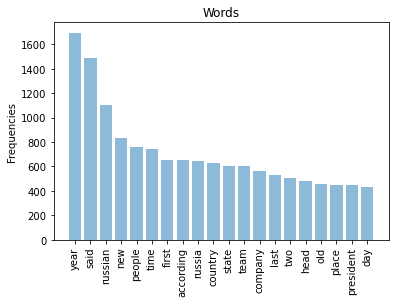

In [46]:
plot_frequencies(top_df)

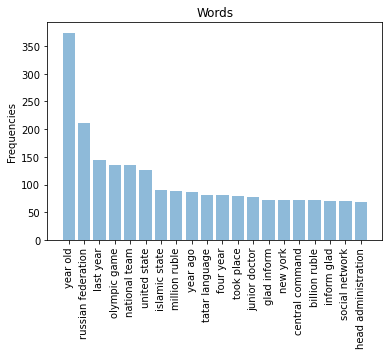

In [47]:
top_df = get_top_n_grams(cleaned_documents, top_k=20, n=2)
plot_frequencies(top_df)

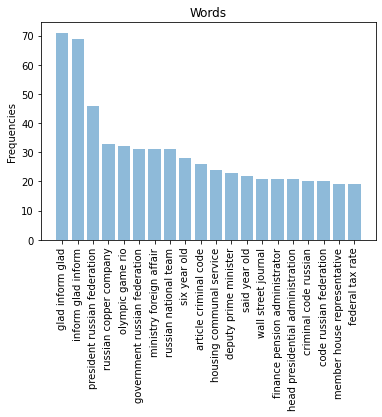

In [48]:
top_df = get_top_n_grams(cleaned_documents, top_k=20, n=3)
plot_frequencies(top_df)

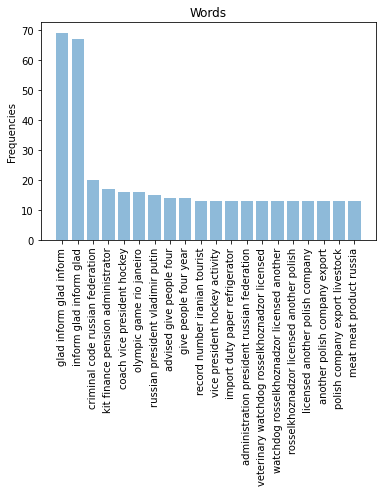

In [49]:
top_df = get_top_n_grams(cleaned_documents, top_k=20, n=4)
plot_frequencies(top_df)

# Rouge

In [129]:
from rouge import Rouge

In [142]:
model_out = translation[4]

ref_out = references[4]

In [143]:
rouge = Rouge()

In [144]:
rouge.get_scores(model_out, ref_out)

[{'rouge-1': {'f': 0.39999999520000007, 'p': 0.5, 'r': 0.3333333333333333},
  'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
  'rouge-l': {'f': 0.39999999520000007, 'p': 0.5, 'r': 0.3333333333333333}}]

In [145]:
rouge.get_scores(model_out, ref_out, avg=True)

{'rouge-1': {'f': 0.39999999520000007, 'p': 0.5, 'r': 0.3333333333333333},
 'rouge-2': {'f': 0.0, 'p': 0.0, 'r': 0.0},
 'rouge-l': {'f': 0.39999999520000007, 'p': 0.5, 'r': 0.3333333333333333}}

In [146]:
references[4]

'ethiopia verge schism'

# chrf_score

In [51]:
import nltk.translate.chrf_score as chrf

In [50]:
a = translation[4].split()
b = references[4].split()

In [109]:
print(chrf.sentence_chrf(a, b))
print(chrf.sentence_chrf(translation[4], references[4]))

0.39355200651404104
0.39355200651404104


In [108]:
chrf.corpus_chrf([translation[4]], [references[4]])

0.39355200651404104

In [55]:
chrf.chrf_precision_recall_fscore_support(a, b,n=1)

(0.2857142857142857, 0.4, 0.38461538461538464, 2)

In [61]:
# https://www.nltk.org/_modules/nltk/translate/chrf_score.html

from collections import Counter, defaultdict
import re

from nltk.util import ngrams


def sentence_chrf(
    reference, hypothesis, min_len=1, max_len=6, beta=3.0, ignore_whitespace=True
):
   
    return corpus_chrf(
        [reference],
        [hypothesis],
        min_len,
        max_len,
        beta=beta,
        ignore_whitespace=ignore_whitespace,
    )



def _preprocess(sent, ignore_whitespace):
    if type(sent) != str:
        # turn list of tokens into a string
        sent = " ".join(sent)

    if ignore_whitespace:
        sent = re.sub(r"\s+", "", sent)
    return sent


def chrf_precision_recall_fscore_support(
    reference, hypothesis, n, beta=3.0, epsilon=1e-16
):
  
    ref_ngrams = Counter(ngrams(reference, n))
    hyp_ngrams = Counter(ngrams(hypothesis, n))

    # calculate the number of ngram matches
    overlap_ngrams = ref_ngrams & hyp_ngrams
    tp = sum(overlap_ngrams.values())  # True positives.
    tpfp = sum(hyp_ngrams.values())  # True positives + False positives.
    tpfn = sum(ref_ngrams.values())  # True positives + False negatives.

    try:
        prec = tp / tpfp  # precision
        rec = tp / tpfn  # recall
        factor = beta ** 2
        fscore = (1 + factor) * (prec * rec) / (factor * prec + rec)
    except ZeroDivisionError:
        prec = rec = fscore = epsilon
    return prec, rec, fscore, tp



def corpus_chrf(
    references, hypotheses, min_len=1, max_len=6, beta=3.0, ignore_whitespace=True
):
   

    assert len(references) == len(
        hypotheses
    ), "The number of hypotheses and their references should be the same"
    num_sents = len(hypotheses)

    # Keep f-scores for each n-gram order separate
    ngram_fscores = defaultdict(lambda: list())

    # Iterate through each hypothesis and their corresponding references.
    for reference, hypothesis in zip(references, hypotheses):

        # preprocess both reference and hypothesis
        reference = _preprocess(reference, ignore_whitespace)
        hypothesis = _preprocess(hypothesis, ignore_whitespace)

        # Calculate f-scores for each sentence and for each n-gram order
        # separately.
        for n in range(min_len, max_len + 1):
            # Compute the precision, recall, fscore and support.
            prec, rec, fscore, tp = chrf_precision_recall_fscore_support(
                reference, hypothesis, n, beta=beta
            )
            ngram_fscores[n].append(fscore)

    # how many n-gram sizes
    num_ngram_sizes = len(ngram_fscores)

    # sum of f-scores over all sentences for each n-gram order
    total_scores = [sum(fscores) for n, fscores in ngram_fscores.items()]

    # macro-average over n-gram orders and over all sentences
    return (sum(total_scores) / num_ngram_sizes) / num_sents

In [64]:
sentence_chrf([translation[4]], [references[4]])

0.39355200651404104

In [63]:
chrf_precision_recall_fscore_support(translation[4], references[4], n=1)

(0.5714285714285714, 0.7407407407407407, 0.7194244604316548, 20)

# GLEU

In [98]:
import nltk
import nltk.translate.gleu_score as gleu

import numpy
import os

try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')

In [99]:
hyp = str(translation[4]).split()
ref_a = str(references[4]).split()

In [100]:
ref_a

['is', 'ethiopia', 'on', 'the', 'verge', 'of', 'schism?']

In [101]:
score_ref_a = gleu.sentence_gleu([ref_a], hyp)
print("Hyp and ref_a are the same: {}".format(score_ref_a))

Hyp and ref_a are the same: 0.13636363636363635


In [102]:
score_ref_a = gleu.corpus_gleu([[ref_a]], [hyp])
print("1 document with 1 reference sentence: {}".format(score_ref_a))

1 document with 1 reference sentence: 0.13636363636363635


In [103]:
score_1to4grams = gleu.sentence_gleu([ref_a], hyp, min_len=1, max_len=4)
score_1to2grams = gleu.sentence_gleu([ref_a], hyp, min_len=1, max_len=2)
print("1 to 4 grams: {}".format(score_1to4grams))
print("1 to 2 grams: {}".format(score_1to2grams))

1 to 4 grams: 0.13636363636363635
1 to 2 grams: 0.23076923076923078


# Meteor

In [96]:
import nltk.translate.meteor_score as meteor
meteor.meteor_score([translation[4]], references[4])

0.3605769230769231